In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
import random
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

random.seed(0)

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
x_dev = x_dev / 255.0
x_test = x_test / 255.0  # normalize pixel values to 0-1. 
print(len(x_dev), len(x_test))  

50000 10000


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size=0.2,random_state = 100)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

In [ ]:
LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] # 10 classes 

In [ ]:
x_dev.shape, y_dev.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
# y_train.min(),y_train.max() # Each y is a number from 0 to 9, each represent a class 

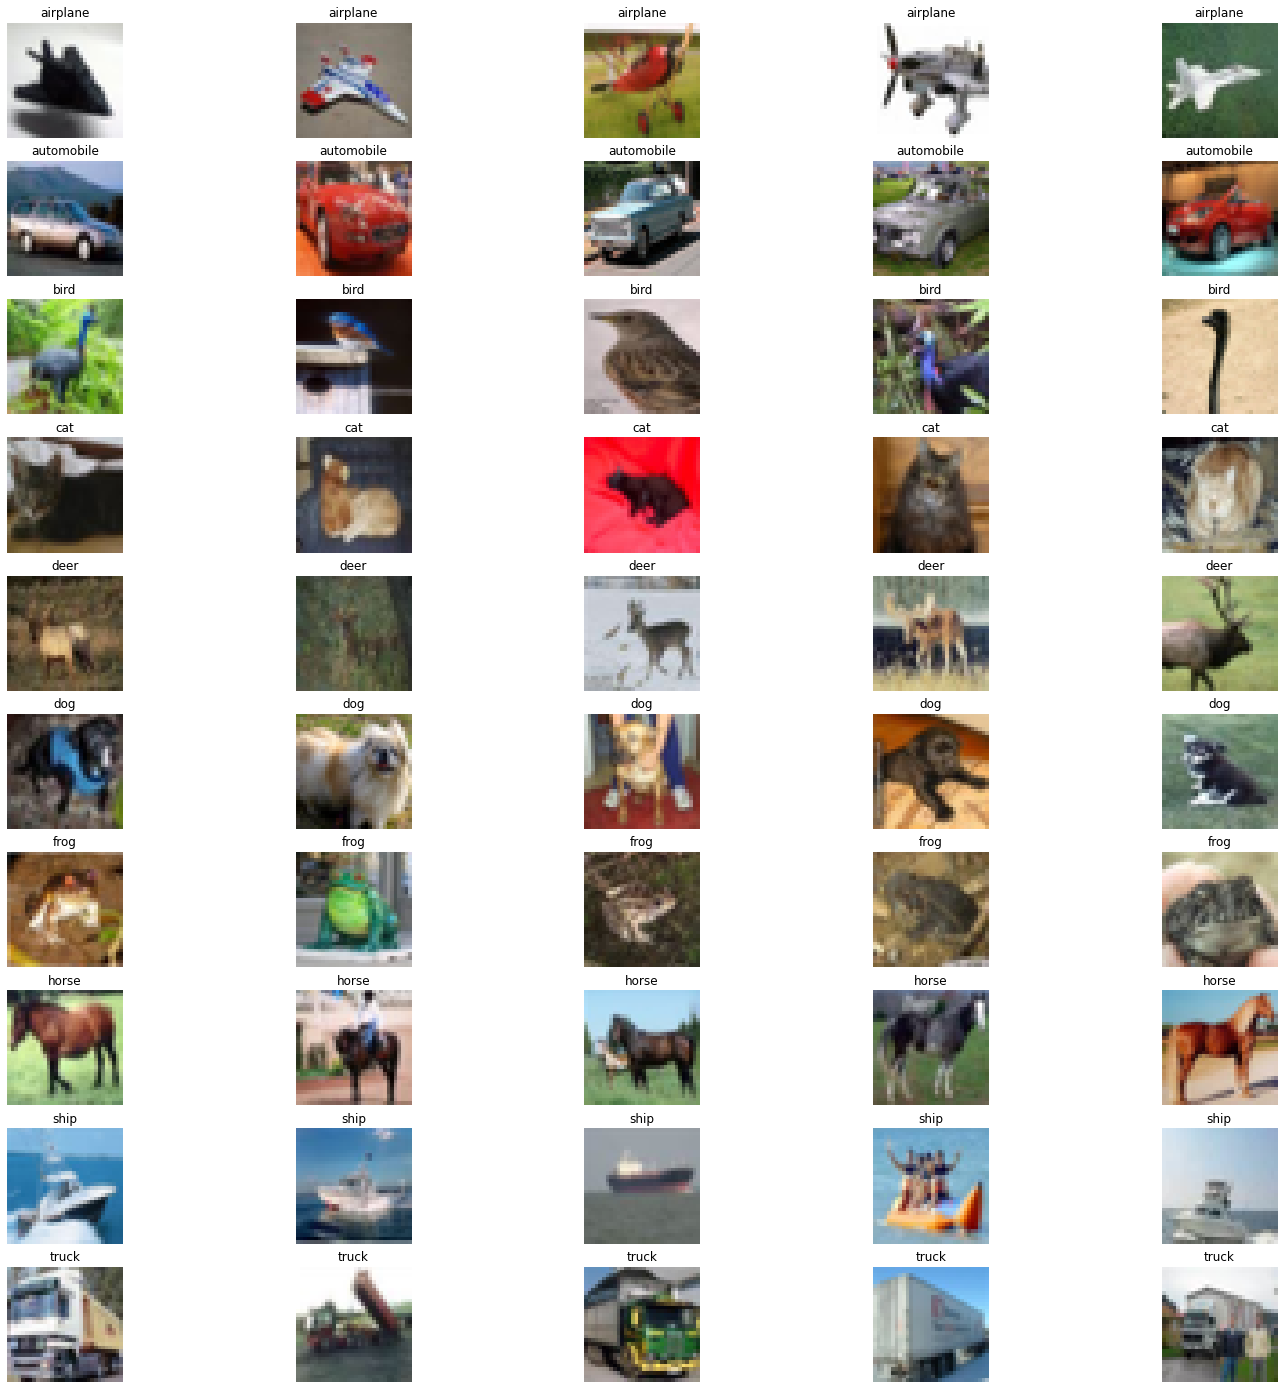

In [ ]:
# Get to know datatset 

fig, axes = plt.subplots(10, 5, figsize=(25, 25))
for i in range(10):   
    for j in range(5):
        class_i_indices = np.where(y_dev == i)[0] # fan array/list 
        img = x_dev[class_i_indices[j]]      
        axes[i,j].imshow(img)     
        axes[i,j].set_title(LABELS[i])
        axes[i,j].set_axis_off()

In [ ]:
# Build a NN model

model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),  # input shape of images. Flatten the input to a vector. No ML here.  
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')    # softmax is a multiclass logistic regression. 10 classes "probability"/confidence sums up to 1
  ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # sparse means numbers are from 0 to 9. 
              metrics=['accuracy']) # categorical crossentropy is the loss function for multi-class classification model.  

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               393344    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
313/313 [==============================] - 3s 6ms/step - loss: 1.9275 - accuracy: 0.3069 - val_loss: 1.7985 - val_accuracy: 0.3527
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 1.7241 - accuracy: 0.3865 - val_loss: 1.6984 - val_accuracy: 0.3903
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 1.6449 - accuracy: 0.4169 - val_loss: 1.6243 - val_accuracy: 0.4196
Epoch 4/20
313/313 [==============================] - 2s 5ms/step - loss: 1.5854 - accuracy: 0.4360 - val_loss: 1.5830 - val_accuracy: 0.4377
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 1.5454 - accuracy: 0.4485 - val_loss: 1.6491 - val_accuracy: 0.4144
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 1.5084 - accuracy: 0.4647 - val_loss: 1.5358 - val_accuracy: 0.4554
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 1.4759 - accuracy: 0.4758 - val_loss: 1.5067 - val_accuracy: 0.4602
Epoch 

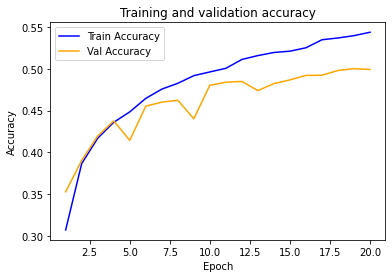

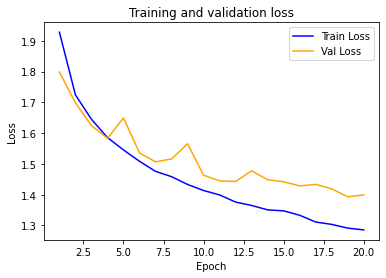

In [ ]:
# Plot loss and accuracy
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), batch_size=128, epochs=20, verbose=1)
# model.fit() returns a History object that contains a dictionary with everything that happened during training.
# Keys are dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(1,len(acc)+1) # start from 1 to len(acc)

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train Accuracy')
  plt.plot(epochs, val_acc, color='orange', label='Val Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure() # Create another figure
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train Loss')
  plt.plot(epochs, val_loss, color='orange', label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(history)

In [ ]:
# Model has predicted the label for each image in the testing set. 
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
score = model.evaluate(x_test, y_test) # model 1
print("Test loss:",score[0], "\nTest accuracy:", score[1]) # With test accuracy of 50%, like random guess

313/313 [==============================] - 1s 3ms/step - loss: 1.3930 - accuracy: 0.5065
Test loss: 1.3930007219314575 
Test accuracy: 0.5065000057220459


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Let's take a look at the first prediction:
# print(predictions[0])
# print(sum(predictions[0])) # correctly sum up to 1

# A predictions[0] is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to 
# each of the 10 different types of clothing. You can see which label has the highest confidence value with np.argmax(predictions[0])

Model prediction: cat
Actual label: cat
This prediction is: True with confidence score: 0.3349871


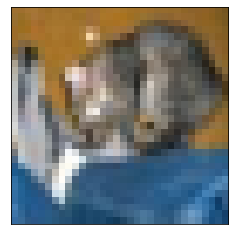

Model prediction: truck
Actual label: ship
This prediction is: False with confidence score: 0.48019668


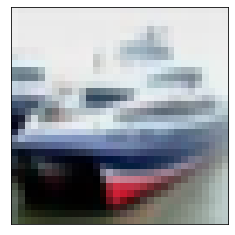

Model prediction: airplane
Actual label: ship
This prediction is: False with confidence score: 0.5570898


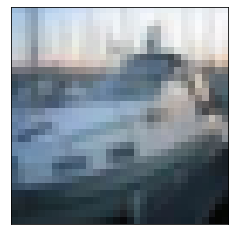

Model prediction: airplane
Actual label: airplane
This prediction is: True with confidence score: 0.39102018


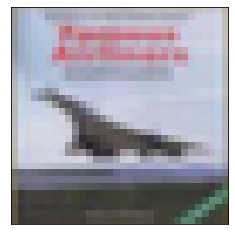

Model prediction: deer
Actual label: frog
This prediction is: False with confidence score: 0.68178433


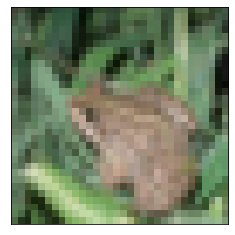

Model prediction: frog
Actual label: frog
This prediction is: True with confidence score: 0.56514126


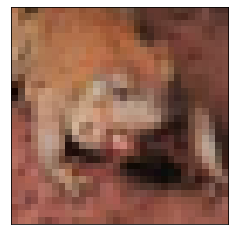

Model prediction: dog
Actual label: automobile
This prediction is: False with confidence score: 0.28151128


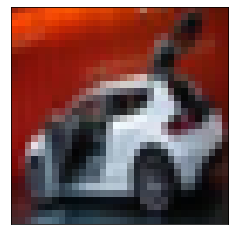

Model prediction: frog
Actual label: frog
This prediction is: True with confidence score: 0.46185726


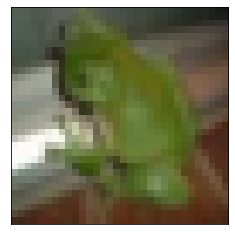

Model prediction: deer
Actual label: cat
This prediction is: False with confidence score: 0.3188117


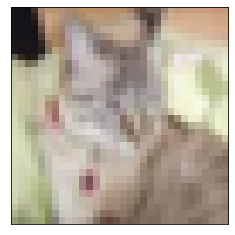

Model prediction: automobile
Actual label: automobile
This prediction is: True with confidence score: 0.7822568


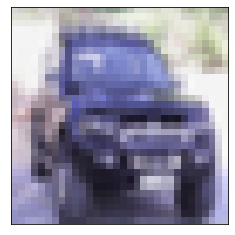

In [ ]:
# Examples of model predictions with images
for i in range(10):
  print("Model prediction:", LABELS[np.argmax(predictions[i])]) #  np.argmax(predictions[i]), "which is a ",
  print ("Actual label:", LABELS[y_test[i][0]]) #  y_test[i][0], "which is a",
  print("This prediction is:", (np.argmax(predictions[i]) == y_test[i])[0], "with confidence score:", max(predictions[i]))
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.show()

In [ ]:
model111 = tf.keras.models.Sequential([ 
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(10, activation='softmax') 
  ])

model111.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # sparse means numbers are from 0 to 9. 
              metrics=['accuracy']) # crossentropy is the loss function for classification. 

history111 = model111.fit(x_train, y_train, validation_data = (x_val, y_val), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
313/313 [==============================] - 3s 6ms/step - loss: 1.6319 - accuracy: 0.4266 - val_loss: 1.4224 - val_accuracy: 0.5059
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 1.3414 - accuracy: 0.5341 - val_loss: 1.3115 - val_accuracy: 0.5513
Epoch 3/20
313/313 [==============================] - 1s 5ms/step - loss: 1.2399 - accuracy: 0.5699 - val_loss: 1.3068 - val_accuracy: 0.5432
Epoch 4/20
313/313 [==============================] - 1s 5ms/step - loss: 1.1878 - accuracy: 0.5914 - val_loss: 1.2669 - val_accuracy: 0.5580
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1427 - accuracy: 0.6058 - val_loss: 1.2540 - val_accuracy: 0.5615
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 1.1037 - accuracy: 0.6168 - val_loss: 1.2474 - val_accuracy: 0.5689
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 1.0745 - accuracy: 0.6281 - val_loss: 1.2539 - val_accuracy: 0.5685
Epoch 

In [ ]:
 model111.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 flatten_5 (Flatten)         (None, 14400)             0         
                                                                 
 dense_9 (Dense)             (None, 10)                144010    
                                                                 
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 1s 3ms/step - loss: 1.2896 - accuracy: 0.5700
Test loss: 1.289641261100769 
Test accuracy: 0.5699999928474426


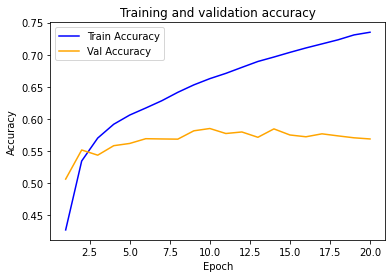

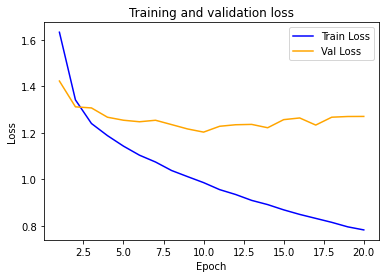

In [ ]:
plot(history111)
score111 = model111.evaluate(x_test, y_test) # test accuracy improved to 56% with just 1 convolutional layer, we can see CNN is much more powerful than dense layers. 
print("Test loss:",score111[0], "\nTest accuracy:", score111[1]) # model 2 

Epoch 1/50
313/313 [==============================] - 10s 24ms/step - loss: 1.5070 - accuracy: 0.4612 - val_loss: 1.1850 - val_accuracy: 0.5824
Epoch 2/50
313/313 [==============================] - 7s 23ms/step - loss: 1.0877 - accuracy: 0.6197 - val_loss: 1.0299 - val_accuracy: 0.6446
Epoch 3/50
313/313 [==============================] - 7s 22ms/step - loss: 0.8844 - accuracy: 0.6956 - val_loss: 0.9720 - val_accuracy: 0.6639
Epoch 4/50
313/313 [==============================] - 7s 23ms/step - loss: 0.7319 - accuracy: 0.7489 - val_loss: 0.9935 - val_accuracy: 0.6658
Epoch 5/50
313/313 [==============================] - 7s 22ms/step - loss: 0.5769 - accuracy: 0.8039 - val_loss: 1.0359 - val_accuracy: 0.6619
Epoch 6/50
313/313 [==============================] - 7s 22ms/step - loss: 0.4337 - accuracy: 0.8504 - val_loss: 1.1525 - val_accuracy: 0.6568
Epoch 7/50
313/313 [==============================] - 7s 23ms/step - loss: 0.2920 - accuracy: 0.9000 - val_loss: 1.3768 - val_accuracy: 0.646

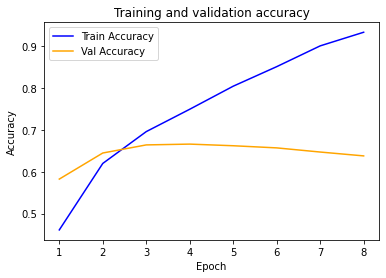

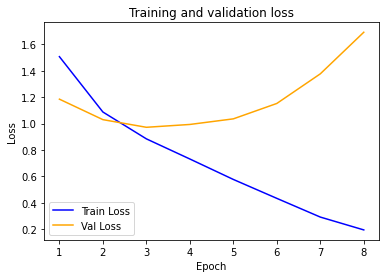

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


model2 = tf.keras.models.Sequential([ 
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(32, (3,3), activation='tanh'),
  Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(10, activation='softmax') 
  ])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # sparse means numbers are from 0 to 9. 
              metrics=['accuracy']) # crossentropy is the loss function for classification. 

history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, 
            epochs= 50, verbose=1, callbacks = EarlyStopping(monitor='val_loss',patience=5))

plot(history2)

In [ ]:
 model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 flatten_6 (Flatten)         (None, 73728)             0         
                                                                 
 dense_10 (Dense)            (None, 10)               

In [ ]:
score2 = model2.evaluate(x_test, y_test)
print("Test loss:",score2[0], "\nTest accuracy:", score2[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.7169 - accuracy: 0.6402
Test loss: 1.7169173955917358 
Test accuracy: 0.6402000188827515


In [ ]:
# Imporved model: Add more layers, dropout layers, and Max Pooling layers

model3 = tf.keras.models.Sequential([ 
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(32, (5,5), activation='tanh'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(10, activation='softmax') 
  ])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        12832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

Epoch 1/50
313/313 [==============================] - 6s 12ms/step - loss: 1.6780 - accuracy: 0.3828 - val_loss: 1.4311 - val_accuracy: 0.4839
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 1.2972 - accuracy: 0.5335 - val_loss: 1.2186 - val_accuracy: 0.5647
Epoch 3/50
313/313 [==============================] - 4s 12ms/step - loss: 1.1370 - accuracy: 0.5962 - val_loss: 1.0657 - val_accuracy: 0.6268
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 1.0180 - accuracy: 0.6402 - val_loss: 0.9980 - val_accuracy: 0.6491
Epoch 5/50
313/313 [==============================] - 3s 10ms/step - loss: 0.9356 - accuracy: 0.6703 - val_loss: 0.9502 - val_accuracy: 0.6690
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 0.8663 - accuracy: 0.6944 - val_loss: 0.8973 - val_accuracy: 0.6850
Epoch 7/50
313/313 [==============================] - 4s 11ms/step - loss: 0.8069 - accuracy: 0.7171 - val_loss: 0.8558 - val_accuracy: 0.6985

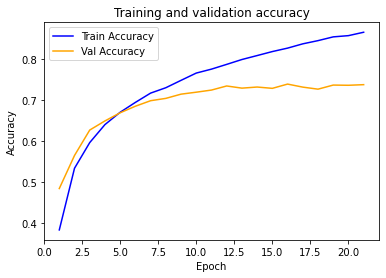

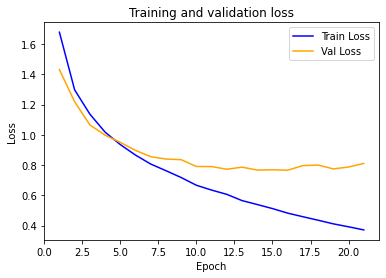

In [ ]:
history3 = model3.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs= 50, verbose=1,
                      callbacks = EarlyStopping(monitor='val_loss',patience=5))

plot(history3)

In [ ]:
score3 = model3.evaluate(x_test, y_test)
print("Test loss:",score3[0], "\nTest accuracy:", score3[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8492 - accuracy: 0.7303
Test loss: 0.8492251038551331 
Test accuracy: 0.7303000092506409


In [ ]:
# Transfer learning using pre-trained model
# Remove the final dense layer that performs classification (include_top=False)
# Import weights from ImageNet, and specify the input shape to match your images. 

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 

base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet", 
    input_shape=(32, 32, 3)
)

# Update the pretrained weights during training 
base_model.trainable = False

# build a new model reusing the pretrained base and adding two layers on top of the convolutional base 
model4 = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Flatten(), 
  Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 9s 18ms/step - loss: 2.1655 - accuracy: 0.2423 - val_loss: 2.0718 - val_accuracy: 0.2857
Epoch 2/50
313/313 [==============================] - 4s 14ms/step - loss: 2.0219 - accuracy: 0.2961 - val_loss: 1.9950 - val_accuracy: 0.2965
Epoch 3/50
313/313 [==============================] - 5s 15ms/step - loss: 1.9669 - accuracy: 0.3047 - val_loss: 1.9606 - val_accuracy: 0.2993
Epoch 4/50
313/313 [==============================] - 4s 12ms/step - loss: 1.9382 - accuracy: 0.3105 - val_loss: 1.9406 - val_accuracy: 0.3036
Epoch 5/50
313/313 [==============================] - 4s 14ms/step - loss: 1.9208 - accuracy: 0.3128 - val_loss: 1.9287 - val_accuracy: 0.3065
Epoch 6/50
313/313 [==============================] - 5s 14ms/step - loss: 1.9088 - accuracy: 0.3160 - val_loss: 1.9196 - val_accuracy: 0.3066
Epoch 7/50
313/313 [==============================] - 4s 14ms/step - loss: 1.9003 - accuracy: 0.3174 - val_loss: 1.9138 - val_accuracy: 0.3106

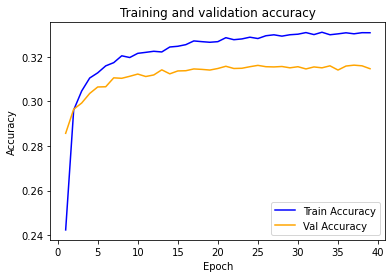

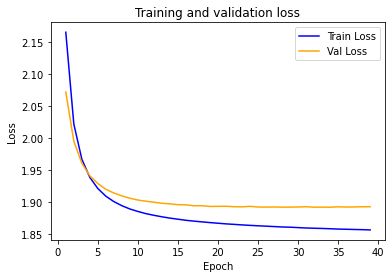

In [ ]:
history4 = model4.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=128, epochs= 50, verbose=1,
                      callbacks = EarlyStopping(monitor='val_loss',patience=5))

plot(history4)

In [ ]:
model4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_13 (Flatten)        (None, 1280)              0         
                                                                 
 dense_25 (Dense)            (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
score4 = model4.evaluate(x_test, y_test)
print("Test loss:",score4[0], "\nTest accuracy:", score4[1]) # Worst performance, worse than all dense layers in Model 1 

313/313 [==============================] - 3s 9ms/step - loss: 1.8993 - accuracy: 0.3180
Test loss: 1.8992830514907837 
Test accuracy: 0.3179999887943268
